## Salary_hike => Predict salary hike using years of experience

##### x – single & continuous (independent) => years of experience

##### y – continuous (dependent) => salary hike

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from pickle import dump
from pickle import load

## 2. Importing dataset

In [2]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. Initial Data Analysis

In [3]:
salary_data.shape   # To get the total no. of rows and columns

(30, 2)

In [4]:
salary_data.isna().sum()   # To check for null values

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.dtypes  # To get the datatypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
salary_data.head(6)   # To get the data of first 6 columns to check for any discrepancy

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


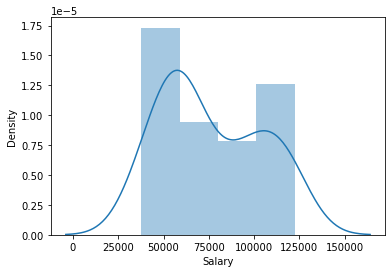

In [7]:
sns.distplot(salary_data['Salary'])      # Distplot for Salary
plt.xlabel('Salary')
plt.show()

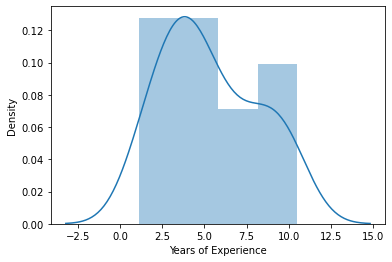

In [8]:
sns.distplot(salary_data['YearsExperience'])        # Distplot for Years of Experience
plt.xlabel('Years of Experience')
plt.show()

## 5. Assumption check by Data Visualization

#### 1. Check for linearity

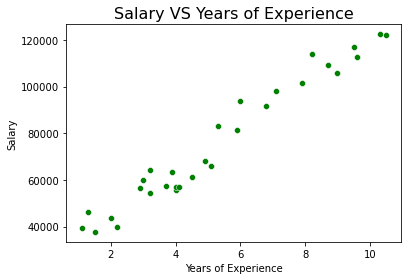

In [9]:
sns.scatterplot(x = salary_data.YearsExperience , y = salary_data.Salary , color = 'green')   # Scatter plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary VS Years of Experience', size = 16)
plt.show()

**Correlation Analysis**

In [10]:
salary_data.corr()   # Strong correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


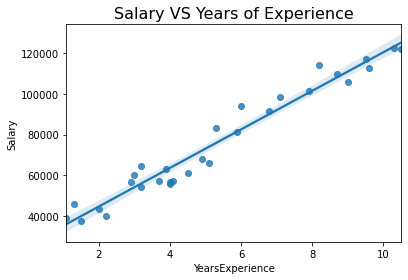

In [11]:
sns.regplot(x = salary_data['YearsExperience'] , y = salary_data['Salary'])               # Reg plot
plt.title('Salary VS Years of Experience', size = 16)
plt.show()

#### 2. Homoscedasticity - It can be checked post model building and training

#### 3. No Multicollinearity - Condition satisfied

#### 4. Autoregression (or) Autocorrelation - Positive correlation

#### 5. Zero residual mean - It can be checked post model building and training

## 6. Model Building | Model Training

In [12]:
linear_reg_model = smf.ols("Salary~YearsExperience", data = salary_data).fit()

**NOTE: With statsmodels model building and training is happening at the same time**

## 7. Model Testing

In [13]:
linear_reg_model.params         # Finding Coefficient parameters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
linear_reg_model.tvalues       # t_values

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [15]:
linear_reg_model.pvalues       # p_values => To know whether the input parameter is significant or not. 
# pvalue of t-test for YearsExperience < 0.05, so there is a good relationship between the input and the output variable.

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [16]:
df = pd.DataFrame(salary_data)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


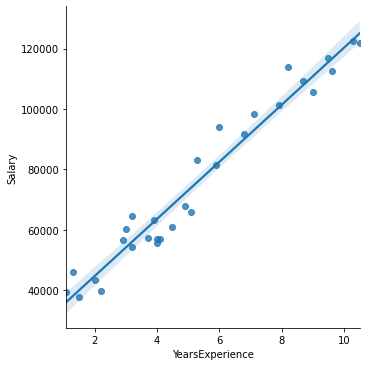

In [28]:
sns.lmplot(x= 'YearsExperience', y= 'Salary', data = salary_data)
plt.show()  
# Homoscedasticity condition satisfied i.e. most of the datapoints lie near the regression line and have constant variance

In [17]:
linear_reg_model.resid.mean    # Zero Residual mean 

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64>

In [19]:
print('R-Squared Value          : ',round(linear_reg_model.rsquared,3))
print('Adjusted R-Squared value : ',round(linear_reg_model.rsquared_adj,3))      
# Finding Rsquared Values
# Adj. R-squared value is almost near to R-squared value.

R-Squared Value          :  0.957
Adjusted R-Squared value :  0.955


In [18]:
linear_reg_model.summary()    # Summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        14:46:24   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8. Model Predicition

In [31]:
Salary = (25792.200199) + (9449.962321)*(3)   # Manual prediction for 3 Years Experience
round(Salary,2)         

54142.09

In [21]:
new_data = pd.Series([4,6])                   # Automatic Prediction for 4, 6 Years Experience
new_data

0    4
1    6
dtype: int64

In [22]:
data_pred = pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,4
1,6


In [30]:
round(linear_reg_model.predict(data_pred),2)

0    63592.05
1    82491.97
dtype: float64

## 9. Model Deployment 

In [29]:
dump(linear_reg_model,open('linear_regression_2.pkl','wb'))
tested_linear_model = load(open('linear_regression_2.pkl','rb'))
tested_linear_model.predict(data_pred)

0    63592.049484
1    82491.974127
dtype: float64

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** 